**Computer Vision library for Pytorch Computer Vision**

* torchvision - base library for pytorch computer vision

* torchvision.datasets - gets datasets and data loading functions for computer vision here

* torchvision.models -get pre trained computer vison models

* torchvision.transforms -function for manipulating your vision data (images) to be suitable for use of an ML model

* torch.utils.data.Dataset -base dataset class for PyTorch

*  torch.utils.data.Dataloader - Creates python iterable over a dataset








In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
print(torch.__version__)

2.3.1+cu121


In [4]:
print(torchvision.__version__)

0.18.1+cu121


#**1. Getting a dataset**

In [5]:
# we are going to use fashion mnist dataset
#can check dataset in kaggle
#torchvision has many inbuilt datasets
from torchvision import datasets

train_data =datasets.MNIST(
    root='data', #where to download
    train=True,  #do we need training dataset
    download=True,#do you want to download(yes or no)
    transform=torchvision.transforms.ToTensor(),#how do we want to transform the data
    target_transform= None #how do want to transform labels/target?


)

test_data =datasets.MNIST(
    root="data",
    train=False,
    download= True,
    transform=ToTensor(),
    target_transform= None
)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34462568.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1271365.38it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9658553.59it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3157197.34it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 16130202.80it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276751.64it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5010891.66it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5364540.87it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data) ,len(test_data)

(60000, 10000)

In [7]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
label

5

In [9]:
class_names=train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [11]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [12]:
image.shape ,label

(torch.Size([1, 28, 28]), 5)

In [13]:
print(f"image shape:{image.shape}-->[colourchannel,height,width]")
print(f"image label:{class_names[label]}->image label:{label}")

image shape:torch.Size([1, 28, 28])-->[colourchannel,height,width]
image label:5 - five->image label:5


In [14]:
len(class_names)

10

In [15]:
class_names[8]

'8 - eight'

#**Visualizing our data**

image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

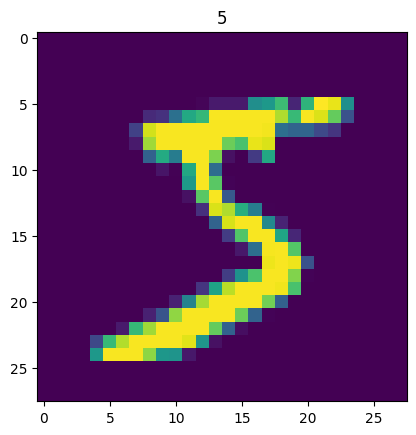

In [16]:
image,label=train_data[0]
print(f"image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

shape of imagetorch.Size([1, 28, 28]) and label :0


(-0.5, 27.5, 27.5, -0.5)

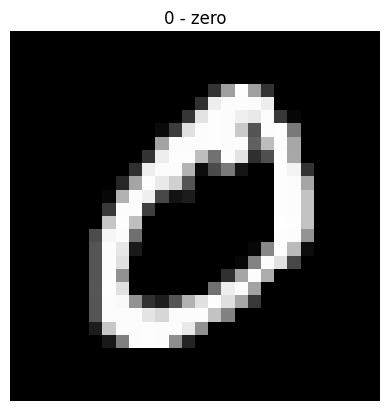

In [17]:
img,l=train_data[1]
print(f"shape of image{img.shape} and label :{l}")
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[l])
plt.axis(False)


(-0.5, 27.5, 27.5, -0.5)

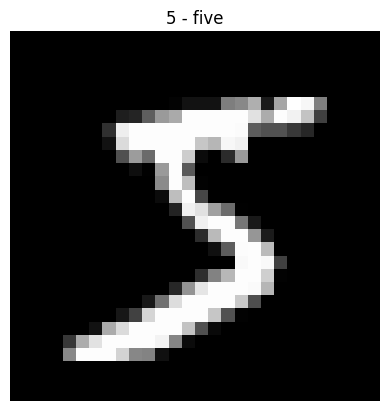

In [18]:
# to convert into grayscale

plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


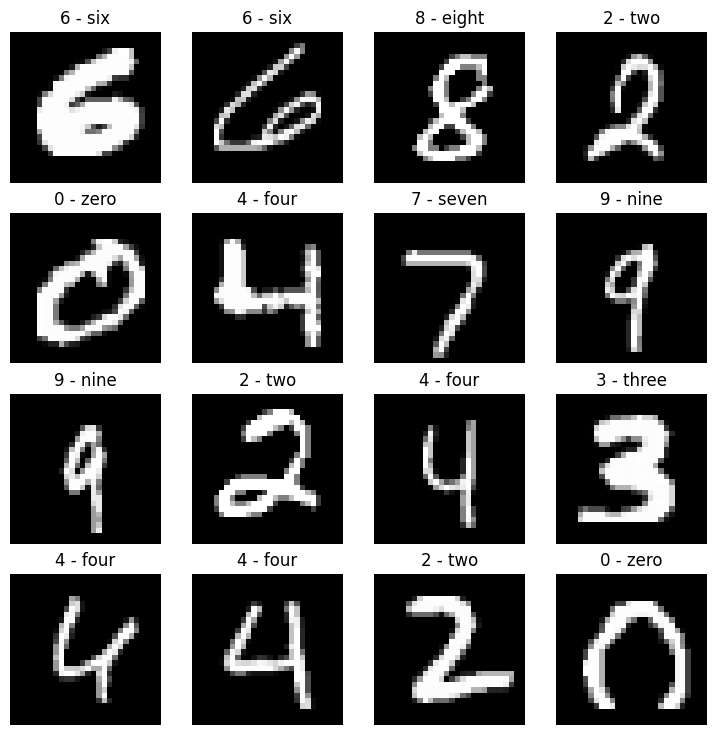

In [19]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  print(random_idx)
  img,label =train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

37542
46067
46876
46414
10026
27335
38620
11924
14950


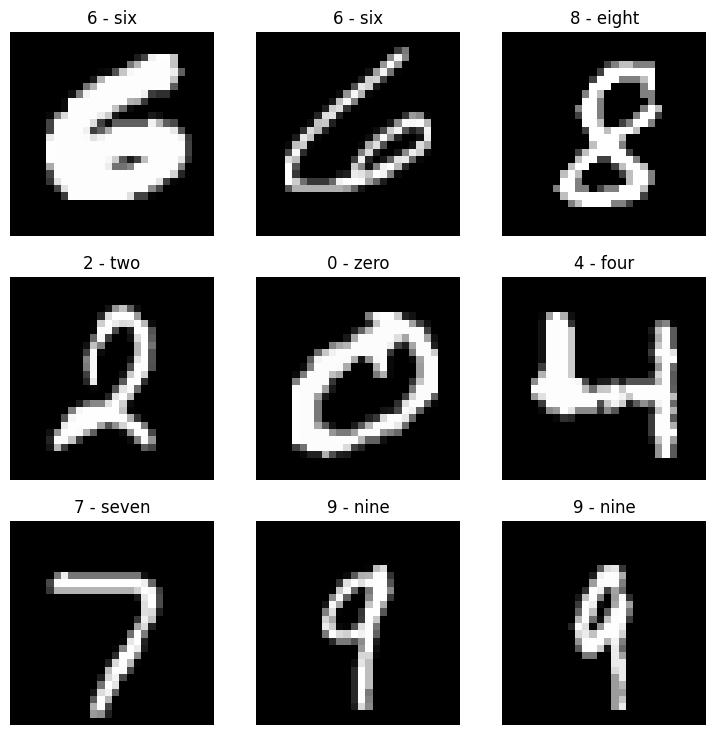

In [20]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=3,3
for i in range(1,rows*cols+1):
  randx=torch.randint(0,len(train_data),size=[1]).item()
  print(randx)
  img,l=train_data[randx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[l])
  plt.axis(False);




Do you think these items of clotthing modelledd with pure linear lines

In [21]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

#2. Prepare DataLoader

Right now ,our data is in the form of Pytorch Datasets.

DataLoader turns our data into Python iterable

more specifically ,we want to turn our
data into mini batches(reducing memory)
* more computationally efficient

* 32 is common batch size

*  It gives nueral network more chances to update its gradients per epoch


In [22]:
from torch.utils.data import DataLoader


BATCH_SIZE =32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )


test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)



In [23]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7baeb0a609a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7baeb0a4eb30>)

In [24]:
print(f"DataLoader:{train_dataloader,test_dataloader}")
print(f"length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test_dataloader :{len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x7baeb0a609a0>, <torch.utils.data.dataloader.DataLoader object at 0x7baeb0a4eb30>)
length of train dataloader:1875 batches of 32
length of test_dataloader :313 batches of 32


In [25]:
#check out whats inside the training dataloader

train_features_batch,train_labels_batch= next(iter(train_dataloader))
train_features_batch.shape ,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image shape:torch.Size([1, 28, 28]) and label:8 and label shape:torch.Size([])


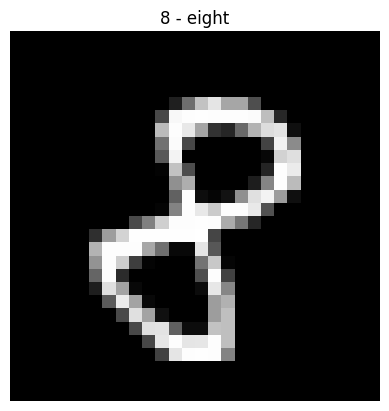

In [26]:
#show sample
#torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
image,label= train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image shape:{image.shape} and label:{label} and label shape:{label.shape}")

#**3. Build Model :Baseline Model**

> It is best to start with baseline model




In [27]:
flattened_model= nn.Flatten()

x= train_features_batch[0]
output =flattened_model(x)
print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [28]:
class FashionModelV1(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_shape:int,
              output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_shape),
        #nn.Linear(in_features=hidden_shape,out_features=hidden_shape),
        nn.Linear(in_features=hidden_shape,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)



In [29]:
torch.manual_seed(42)
model_0 = FashionModelV1(input_shape=784,
                         hidden_shape=10,
                         output_shape=len(class_names))
model_0

FashionModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [30]:
dummy_x= torch.rand([1 ,1 ,28 , 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [31]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#set up loss and optimizer

loss_fn = nn.CrossEntropyLoss()(multiclass)
optimizer = torch.optim.SGD()  

evaluation so we use accuracy metric

In [32]:
#def accuracy_fn(Y_true,Y_pred):
  #correct = torch.eq(Y_true,Y_pred)
  #acc = correct/len(Y_pred)*100
  #return acc


In [33]:
from urllib import request
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exist,skipping download...")
else:
  print("Downloading helper_functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


In [34]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

#create a function to time expirement


Machine learning is very expiremental.
Two main things to track
______________________
1. Models Performance (loss and accuracy values etc.)

2. How fast it runs

In [35]:
from timeit  import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device:torch.device=None):
  total_time =end -start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [36]:
start_time= timer()
end_time = timer()

print_train_time(start=start_time,end=end_time,device="cpu")


Train time on cpu: 0.000 seconds


5.4386000016393155e-05

#Creating  a training loop and training model on batches of data

1. Loop through epochs

2. Loop through training batches, perform training steps ,calculate the train loss per batch

3. Loop through testing batches,
perform testing steps ,calculate the
testing loss per batch

4. Print out whats happening

5. Time it all(for fun)

In [37]:
from tqdm.auto import tqdm # progres bar

torch.manual_seed(42)
train_time_start_on_cpu =timer()
# set no of epochs

epochs =3

#create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-----")
  train_loss=0

  #add a loop through training batches
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()
    #do forward
    y_pred =model_0(X)

    # calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step

    optimizer.step()
    if batch%400 ==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  #testing

  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test ,y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/= len(test_dataloader)
  print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f} |  Test acc:{test_acc:.4f}")
train_time_end_on_cpu = timer()
total_train_time_model_0 =print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device =str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.4051 | Test loss:8.7810 |  Test acc:12.0707
Epoch:1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.3084 | Test loss:10.8976 |  Test acc:11.7612
Epoch:2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.2960 | Test loss:13.0452 |  Test acc:12.1306
Train time on cpu: 39.502 seconds


In [38]:
str(next(model_0.parameters()).device)

'cpu'

In [39]:
device ="cuda" if torch.cuda.is_available() else "Cpu"
device

'Cpu'

# 4. Make predictions and get Model0 results





In [40]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               ):
  "Returns dictionary containing the results of model on data loader"
  loss, acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #make predictions
      y_pred =model(X)
      #Accumulate the loss and accuracy value  per bacth
      loss += loss_fn(y_pred,y)
      acc +=  accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1) )
      #Scale losss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc  /= len(data_loader)

  return {"model_name":model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model= model_0,
                              data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionModelV1',
 'model_loss': 13.045226097106934,
 'model_acc': 12.130591054313099}

#5. setup device agnostic code (if you are using GPU)

In [41]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [42]:
torch.cuda.is_available()

False

In [43]:
#set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1. Building a better model with Non Linearity

In [44]:
class FashionModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #flatten inputs into single vector
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()

    )
  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)


In [45]:
#create an instance of model 2

torch.manual_seed(42)
model_1 = FashionModelV2(input_shape=784,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)


In [46]:
next(model_1.parameters()).device

device(type='cpu')

#6.1 Set up loss,optimizer and evaluation metrics

In [47]:
from helper_functions import accuracy_fn
loss_fn =nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(params=model_1.parameters(),lr=0.1)

#6.2 Training and Testing loop and evaluation model

* create two functions

* Train step

* Test step

In [48]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device =device):
   "performs a training with model trying to learn on data_loader"


   train_loss , train_acc = 0,0
   model.train()
  #add a loop through training batches
   for batch , (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)
    #do forward
    y_pred =model(X)

    # calculate loss (per batch) and accuracy
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step

    optimizer.step()

   train_loss /= len(data_loader)
   train_acc /= len(data_loader)
   print(f"Train_loss:{train_loss:.5f} | Train_acc: {train_acc:.2f}%")


In [49]:
def test_step(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  test_loss,test_acc =0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y =X.to(device) ,y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true =y,y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%")



In [ ]:
torch.manual_seed(42)

from timeit import  default_timer as timer

train_time_start_on_gpu = timer()
epochs= 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu= timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end= train_time_end_on_gpu,
                                            device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------------
Train_loss:0.45602 | Train_acc: 86.75%
Test loss:6.19115 | Test acc:10.18%
Epoch:1
------------


In [ ]:
model_0_results

In [ ]:
total_train_time_model_0

In [ ]:
model_1_results =eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_results

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  "Returns dictionary containing the results of model on data loader"
  loss, acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device) ,y.to(device)
      #make predictions
      y_pred =model(X)
      #Accumulate the loss and accuracy value  per bacth
      loss += loss_fn(y_pred,y)
      acc +=  accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1) )
      #Scale losss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc  /= len(data_loader)

  return {"model_name":model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

## Building CNN

In [ ]:
class FashionMNISTModelV2(nn.Module):
 # "Model architecture that replicates the TinyVGG"
  #"Model from CNN expliner website"
  def __init__(self,input_shape: int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 =nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2 =nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x= self.conv_block_1(x)
    #print(f"output shape of conv 1:{x.shape}")
    x= self.conv_block_2(x)
    #print(f"output shape of conv 2:{x.shape}")
    x=self.classifier(x)
    #print(f"output shape of  classifier:{x.shape}")
    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
#pass image through model
rand_image = torch.randn(size=(1,28,28))
model_2(rand_image.unsqueeze(0))


##7.1 Stepping through nn.Conv2d

In [ ]:
torch.manual_seed(42)
images =torch.randn(size=(32,3,64,64))
test_image =images[0]

print(f"Images batch shape:{image.shape}")
print(f"single image shape:{test_image.shape}")
print(f"Test image:\n{test_image}")



In [ ]:
#model_2.state_dict()

In [ ]:
#create single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image)
conv_output.shape

In [ ]:
print(f"test image orginal shape{test_image.shape}")
print(f"test image with unsqueeze dimension{test_image.unsqueeze(0).shape}")

#create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer(): {test_image_through_conv.shape}")
test_image_through_conv_and_max_pool_ayer = max_pool_layer(test_image_through_conv)
print(f"test image after going through conv layer and max pool layer:{test_image_through_conv_and_max_pool_ayer.shape}")

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

## Setup a loss function and optimizer for model_2

In [ ]:

# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## Training and testing model_2 using our training and test functions

In [ ]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


In [ ]:
#get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)
model_2_results

### Compare  model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,model_1_results,
                                model_2_results])
compare_results


In [ ]:
compare_results['training_time']=[total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]

In [ ]:
compare_results

In [ ]:
#visualise our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");

##9. Make and evaluate random prediction with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device =device):
  pred_probs =[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #explore the sample(add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)
      #forward pass1(model outputs raw logits)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)
      #get pred_prob off the gpu for calculations
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)




In [ ]:
#img,label =test_data[0][:10]
#img.shape,label

In [ ]:
import random
#random.seed(42)

test_samples =[]
test_labels =[]
#randomly sampling 9 samples
for sample ,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

  #veiw the first sample shape
test_samples[0].shape

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#Make predictions
pred_probs = make_predictions(model=model_2,
                              data= test_samples)

pred_probs[:2] #first 2 prediction probability

In [ ]:
#convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

In [ ]:
test_labels

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols =3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")

  #find prediction (in text form"sandal)
  pred_label =class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  #create a title for plot

  title_text =f"Pred: {pred_label} | Truth:{truth_label}"
  #check for equlity between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False);

#Making a confusion matrix for further prediction evaluation

1.  Make a prediction with our trained model on test dataset



2. Make confusion matrix torch.metrix.confusionMatrix

3. Plot confusion matrix using mixtend.pltting.plot_confusion_matrix

In [ ]:
import mlxtend

In [ ]:
from tqdm.auto import tqdm
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions..."):
    #send the data and target to target device

    X,y = X.to(device) ,y.to(device)
    y_logit =model_2(X)

    y_pred =torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
  print(y_preds)
  y_pred_tensor =torch.cat(y_preds)
  y_pred_tensor[:10]


In [ ]:

len(y_pred_tensor)

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

In [ ]:
import mlxtend
print(mlxtend.__version__)


In [ ]:
class_names

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#2.set up cunfusion metrix instance compare predictions to target
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds= y_pred_tensor,
                         target =test_data.targets)

#3. plot confusion metrix
fig , ax = plot_confusion_matrix(
    conf_mat =confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10,7)

)

In [ ]:
test_data.targets

In [ ]:
confmat_tensor

##Save and load best performing model

In [ ]:
from pathlib import Path
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents =True,
                 exist_ok =True)
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save model
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f= MODEL_SAVE_PATH)


In [ ]:
torch.manual_seed(42)
loaded_model_2= FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))


loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


#send model to target device

loaded_model_2.to(device)

In [ ]:
model_2_results

In [ ]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model= loaded_model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn =accuracy_fn
)

loaded_model_2_results